# [*Lab Project Part 1*]() Image Classification using Bag-of-Words
------------------------------

# **General Guideline**
1. Aim:
    - Able to understand the basic Image Classification/Recognition pipeline using traditional Bag of Words method.
    - Able to use to python packages for image classification: *matplotlib, cv2, sklearn etc.*
2. Prerequisite:
    - Familiar with python and relevant packages.
    - Know the basics of feature descriptors(SIFT, HoG) and machine learning tools (K-means, SVM and etc.). 
3. Guidelines:
    Students should work on the assignments in a group of **three person** for two weeks. Some minor additions and changes  might happen with approval from the Senior TA. Students will be informed for these changes via Canvas. Any questions regarding the assignment content can be discussed on Piazza. Students are expected to do this assignment in Python and Pytorch, however students are free to choose other tools (like Tensorflow). Your source code and report must be handed in together in a zip file (*ID1_ID2_ID3.zip*) before the deadline. Make sure your report follows these guidelines:
    - *The maximum number of pages is 10 (single-column, including tables and figures). Please express your thoughts concisely.*
    - *Follow the given script and answer all given questions (in green boxes). Briefly describe what you implemented. Blue boxes are there to give you hints to answer questions.*
    - *Analyze your results and discuss them, e.g. why algorithm A works better than algorithm B on a certain problem.*
    - *Tables and figures must be accompanied by a brief description. Do not forget to add a number, a title, and if applicable name and unit of variables in a table, name and unit of axes and legends in a figure.*
4. **Late submissions** are not allowed. Assignments that are submitted after the strict deadline will not be graded. In case of submission conflicts, TAs' system clock is taken as reference. We strongly recommend submitting well in advance, to avoid last minute system failure issues.
5. **Plagiarism note**: 
Keep in mind that plagiarism (submitted materials which are not your work) is a serious crime and any misconduct shall be punished with the university regulations.

<!-- ### PyTorch versions
we assume that you are using latest PyTorch version(>=1.4)

### PyTorch Tutorial & Docs
This tutorial aims to make you familiar with the programming environment that will be used throughout the course. If you have experience with PyTorch or other frameworks (TensorFlow, MXNet *etc.*), you can skip the tutorial exercises; otherwise, we suggest that you complete them all, as they are helpful for getting hands-on experience.

**Anaconda Environment** We recommend installing \textit{anaconda} for configuring \textit{python} package dependencies, whereas it's also fine to use other environment managers as you like. The installation of anaconda can be found in [anaconda link](https://docs.anaconda.com/anaconda/install/).

**Installation** The installation of PyTorch is available at [install link](https://pytorch.org/get-started/locally/) depending on your device and system.

**Getting start** The 60-minute blitz can be found at [blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html), and and examples are at [examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

**Documents** There might be potential unknown functions or classes, you shall look through the official documents website ([Docs](https://pytorch.org/docs/stable/index.html)) and figure them out by yourself. (***Think***:} What's the difference between *torch.nn.Conv2d* and *torch.nn.functional.conv2d*?)
You can learn pytorch from the [tutorial link](https://pytorch.org/tutorials/). The Docs information can be searched at [Docs](https://pytorch.org/docs/stable/index.html). In this assignments, we wish you to form the basic capability of using one of the well-known   -->

# **Instruction**

1. Students are expected to prepare a report for this project. The report should include the analysis of the results for different settings.

 Do not just provide numbers, remember to follow the general guidelines and discuss different settings.

2. For qualitative evaluation, you are expected to visualize the top-5 and the bottom-5 ranked test images (based on the classifier confidence for the target class) per setup. That means you are supposed to provide a figure for each experimental setup, as discussed in Section 2.6.

3. A demo function which runs the whole system should be prepared and submitted with all other implemented functions.

**Hint:** Having visual elements such as charts, graphs and plots are always useful for everyone. Keep this in mind while writing your reports. 


# **1. Introduction**

The goal of the assignment is to implement a system for image classification. In other words, this system should tell if there is an object of given class in an image. You will perform 5-class ({1: *airplanes*, 2: *birds*, 3: *ships*, 4: *horses*, 5: *cars*}) image classification based on bag-of-words approach ([reference](http://www.robots.ox.ac.uk/~az/icvss08_az_bow.pdf)) using SIFT features, respectively. [STL-10 dataset](https://cs.stanford.edu/~acoates/stl10/) will be used for the task. For each class, test sub-directories contain 800 images, and training sub-directories contain 500 images. Images are represented as (RGB) 96x96 pixels.

Download the [dataset](http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz). There are five files: *test_X.bin*, *test_y.bin*, *train_X.bin*,*train_y.bin* and *unlabeled_X.bin*. For the project, you will just use the train and test partitions. Download the dataset and make yourself familiar with it by figuring out which images and labels you need for the aforementioned 5 classes. Note that you do not need *fold_indices* variable.

**Hint:**
In a real scenario, the public data you use often deviates from your task. You need to figure it out and re-arrange the labels as required using *stl10\_input.py* as a reference. 

## **1.1 Training Phase**

Training must be conducted over the training set. Keep in mind that using more samples in training will likely result in better performance. However, if your computational resources are limited and/or your system is slow, it's OK to use less number of training data to save time.

**Hint:** To debug your code, you can use a small amount of input images/descriptors. Once you are sure everything works properly, you can run your code for the experiment using all the data points. 

**Hint:** You are not allowed to use the test images for training purpose. 

## **1.2 Training Phase**

You have to test your system using the specified subset of test images. All 800 test images should be used at once for testing to observe the full performance. Again, exclude them from training for fair comparison.

In [58]:
# !pip install imageio
# !pip install pandas
import skimage
from skimage import feature
import imageio
from stl10_input import *
import cv2

# Imports for machine learning
from sklearn.cluster import KMeans 
import pandas as pd
from sklearn.svm import SVC

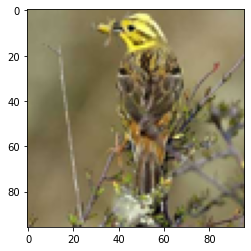

(5000, 96, 96, 3)
(5000,)
(8000, 96, 96, 3)
(8000,)


In [59]:
TRAIN_DATA_PATH = './data/stl10_binary/train_X.bin'
TRAIN_LABEL_PATH = './data/stl10_binary/train_y.bin'

TEST_DATA_PATH = './data/stl10_binary/test_X.bin'
TEST_LABEL_PATH = './data/stl10_binary/test_y.bin'

if __name__ == "__main__":
    # Test to check if the image is read correctly
    with open(TRAIN_DATA_PATH) as f:
        image = read_single_image(f)
        plot_image(image)

    # Test to check if the whole dataset is read correctly
    images = read_all_images(TRAIN_DATA_PATH)
    print(images.shape)

    labels = read_labels(TRAIN_LABEL_PATH)
    print(labels.shape)
    test_images = read_all_images(TEST_DATA_PATH)
    test_labels = read_labels(TEST_LABEL_PATH)
    
    print(test_images.shape)
    print(test_labels.shape)

# **2. Bag-of-Words based Image Classification**

Bag-of-Words based Image Classification system contains the following steps: 
1. Feature extraction and description
2. Building a visual vocabulary
3. Quantify features using visual dictionary (encoding)
4. Representing images by frequencies of visual words
5. Train the classifier

We will consider each step in detail.


## **2.1 Feature Extraction and Description**

SIFT descriptors can be extracted from either (1) densely sampled regions or (2) key points. You can use SIFT related functions in *OpenCV* for feature extraction.

####  **` Q2.1: Extract SIFT descriptor from training datasets based on both densely sampled regions and key points. For both extraction approaches, show two image from each of the five class (draw the circles with size of keypoint). (10-pts).`**  

**Hint:**
Check out the Docs of SIFT and related functions for further information in the following [link1](https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html) and [link2](https://docs.opencv.org/3.4.9/d5/d3c/classcv_1_1xfeatures2d_1_1SIFT.html).

**Note:**
For copyright reason, the newest version of OpenCV does not contain SIFT related function. However you can install an old version (for example: opencv-python==3.4.2.17 and opencv-contrib-python==3.4.2.17). 

In [84]:
# Get keypoints for all images
def feature_extraction(train_images, extraction_method = 'keypoints'):

    # Initialize list containing descriptors for all images
    des_feature_list = []
    
    # Get densely sampled regions for all images
    alt_feature_list = []
    
    # Get HoG features for all images
    hog_feature_list = []
    
    
    # Different feature extraction methods
    
    # Densely sampled regions
    if extraction_method == 'dense':
        for image in train_images:
            alt_sample_list += ['hello'] #TODO
            
    # HoG
    elif extraction_method == 'hog':
        for image in train_images:
            des = skimage.feature.hog(image, feature_vector=False)
            
            if des is not None:
                for feature in des:
                    hog_feature_list += [feature]
            
    # Sift keypoints
    elif extraction_method == 'keypoints':
        # For loop performing SIFT feature extraction on all images
        for image in train_images:
            sift = cv2.xfeatures2d.SIFT_create()
            kp, des = sift.detectAndCompute(image, None)

            if des is not None:
                for feature in des:
                    des_feature_list += [feature]

    # When no correct extraction method has been defined
    else:
        print("Extraction method has to be one of either ['dense', 'hog' or 'keypoints']")
        
    return des_feature_list, alt_feature_list

In [83]:
# Visualizing

## **2.2 Building Visual Vocabulary**

Here, we will obtain visual words by clustering feature descriptors, so each cluster center is a visual word. Take a subset (maximum half) of all training images (this subset should contain images from ALL categories), extract SIFT descriptors from all of these images, and run k-means clustering (you can use your favourite k-means implementation) on these SIFT descriptors to build visual vocabulary. Then, take the rest of the training images to calculate visual dictionary. Nonetheless, you can also use less images, say 100 from each class (exclusive from the previous subset) if your computational resources are limited. Pre-defined cluster numbers will be the size of your vocabulary. In this question, set its size to 1000. 

####  **` Q2.2: Building Visual Vocabulary. (10-pts)`**
Create visual vocabulary by using K-means clustering. Remember to display the results when the vocabulary subset is 30\%, 40\%, 50\% and 60\% amount of the training images. The vocabulary size is fixed 1000 in this question.

**Hint:** Remember first to debug all the code with a small amount of input images and only when you are sure that code functions correctly run it for training over the larger data. You can achieve K-means clustering using either \textit{sklearn} package or \textit{scipy} package.

In [5]:
# Function that uses KMeans algorithm to find 1000 cluster centers
def find_centers(descriptors, k=1000):
    kmeans = KMeans(n_clusters = k, n_init=2)
    kmeans.fit(descriptors)
    vocabulary = kmeans.cluster_centers_
    
    return vocabulary, kmeans

In [6]:
# For different image subset sizes build the visual vocabulary

# 30% takes about 6 minutes to run!
# Total takes about 28 minutes to run!

print("Starting training...")

# 30% of all train images used
_, kmeans30 = find_centers(feature_extraction(images[:int(len(images)*0.3)], 'keypoints')[0])
print("KMeans algorithm using 30% of the images has been trained!")

# 40% of all train images used
_, kmeans40 = find_centers(feature_extraction(images[:int(len(images)*0.4)], 'keypoints')[0])
print("KMeans algorithm using 40% of the images has been trained!")

# # 50% of all train images used
_, kmeans50 = find_centers(feature_extraction(images[:int(len(images)*0.5)], 'keypoints')[0])
print("KMeans algorithm using 50% of the images has been trained!")

# # 60% of all train images used
_, kmeans60 = find_centers(feature_extraction(images[:int(len(images)*0.6)], 'keypoints')[0])
print("KMeans algorithm using 60% of the images has been trained!")

print("Training done for all image subsets!")

KMeans algorithm using 30% of the images has been trained!
KMeans algorithm using 40% of the images has been trained!
KMeans algorithm using 50% of the images has been trained!
KMeans algorithm using 60% of the images has been trained!


In [7]:
def get_vocabulary(image_subset, kmeans, plotting=True, k=1000):
    
    # Initialize a dictionary for all vocabulary (init count at 0)
    img_cluster_count = {i: 0 for i in range(k)}
    
    # Find the descriptors using feature_extraction function
    descriptors, _ = feature_extraction(image_subset)
    
    # Descriptors can be empty, in that case, we don't predict
    if len(descriptors) != 0:
        pred = kmeans.predict(descriptors)
    else:
        return img_cluster_count
        
    # For all predictions add them to the count
    for p in pred:
        img_cluster_count[p] += 1
        
    # Plot histogram when wanted
    if plotting is True:
        plot_histogram(img_cluster_count)
        
    return img_cluster_count

In [8]:
# Function used to plot a histogram

def plot_histogram(image_cluster_count):
    # Initialize the weights and bins
    weights = []
    bins = []

    # Sort all our values in the dictionary for correct display in histogram
    for key in sorted(img_cluster_count):
        bins += [key]
        weights += [img_cluster_count[key]]  

    # Display the histogram
    plt.hist(bins, bins, weights = weights, density=True)
    plt.show()

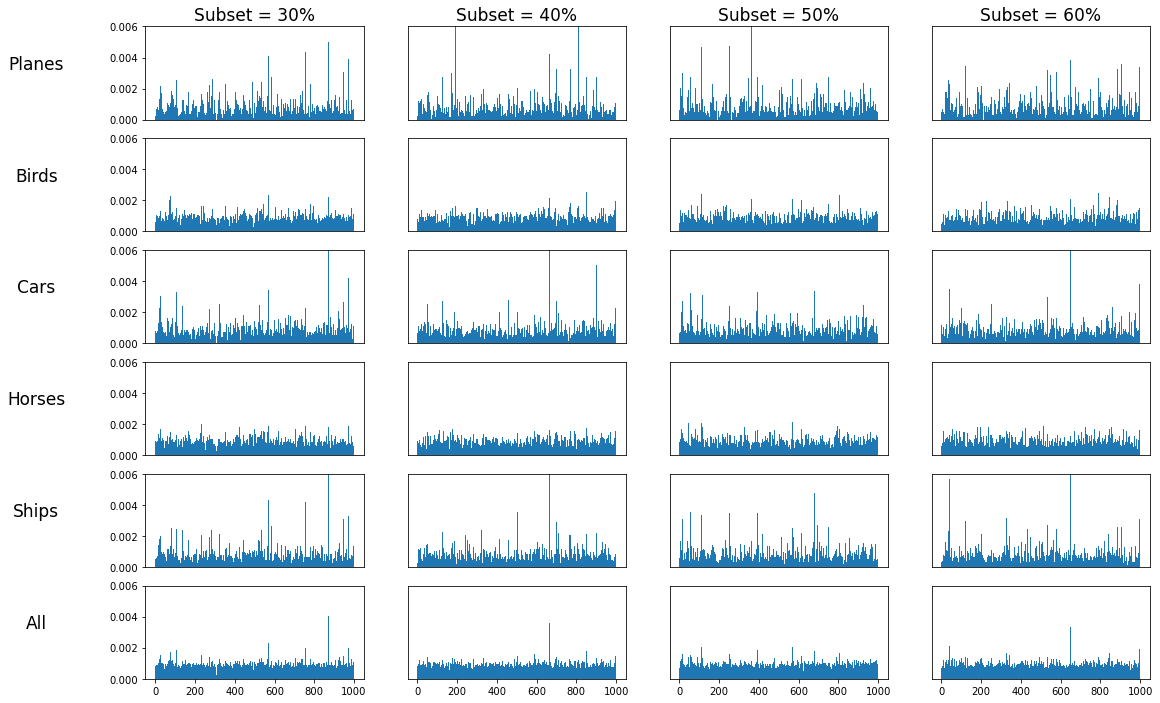

In [9]:
# Plot everything

# Takes about 3 minutes

# Relevent classes
classes = [1, 2, 3, 7, 9]
class_names = ['Planes', 'Birds', 'Cars', 'Horses', 'Ships', 'All']

# Relevant remaining subset percentages (70%, 60%, 50%, 40%)
percents = [0.3, 0.4, 0.5, 0.6]

# All the calculated kmeans cluster centers for different subset sizes
kmeans = {0.3: kmeans30, 0.4: kmeans40, 0.5: kmeans50, 0.6: kmeans60}

# Initialize figure size
fig, axs = plt.subplots(6, 4, figsize=(18, 12))

# All the rows will be the classes
for row in range(len(classes) + 1):
    
    # The last row is ALL the classes
    if row == len(classes):
        relevant_labels = np.array([i for i in range(1, 11)])
        
    # The other rows are just their class
    else:
        c = classes[row]
        relevant_labels = np.array([c])
    
    # All the columns will be the subset sizes
    for column in range(len(percents)):
        
        # Set p to be the size of the subset
        p = percents[column]
        
        # Only keep the images of the relevant class for this row
        img_class_subset = keep_relevant_images(images[int(len(images)*p):], labels[int(len(images)*p):], \
                                               relevant_labels)[0]
        
        # Get the vocabulary for these images
        img_cluster_count = get_vocabulary(img_class_subset, kmeans[p], plotting=False);

        # Plot the histogram of the vocabulary
        weights = []
        bins = []

        for key in sorted(img_cluster_count):
            bins += [key]
            weights += [img_cluster_count[key]]  

        # Set the layout correctly (delete axes)
        if column != 0 and row != 5:
            axs[row, column].set_ylim([0, 0.006])
            axs[row, column].hist(bins, bins, weights = weights, density=True)
            axs[row, column].yaxis.set_visible(False)
            axs[row, column].xaxis.set_visible(False)
        elif column != 0:
            axs[row, column].set_ylim([0, 0.006])
            axs[row, column].hist(bins, bins, weights = weights, density=True)
            axs[row, column].yaxis.set_visible(False)
        elif row != 5:
            axs[row, column].set_ylim([0, 0.006])
            axs[row, column].hist(bins, bins, weights = weights, density=True)
            axs[row, column].xaxis.set_visible(False)
        else:
            axs[row, column].set_ylim([0, 0.006])
            axs[row, column].hist(bins, bins, weights = weights, density=True)
            
    # Add appropriate titles
    for i, class_name in enumerate(class_names):
        axs[i, 0].set_ylabel(f'{class_name}', rotation=0, size=17)
        axs[i, 0].yaxis.set_label_coords(-0.5, 0.5)
        
    for i, subset in enumerate(percents):
        axs[0, i].set_title(f'Subset = {int(subset*100)}%', fontsize=17)

## **2.3 Encoding Features Using Visual Vocabulary**

Once we have a visual vocabulary, we can represent each image as a collection of visual words. For this purpose, we need to extract feature descriptors (SIFT) and then assign each descriptor to the closest visual word from the vocabulary.

## **2.4 Representing images by frequencies of visual words**

The next step is the quantization. The idea is to represent each image by a histogram of its visual words. Check out ***matplotlib***'s *hist* function. Since different images can have different numbers of features, histograms should be normalized.

####  **` Q2.4: Representing images by frequencies of visual words. (5-pts)`**

Pick one of the subset ratios from the above four settings (30%, 40%, 50% and 60%). Show the histogram of each class
under this setting. Describe the similarities and differences

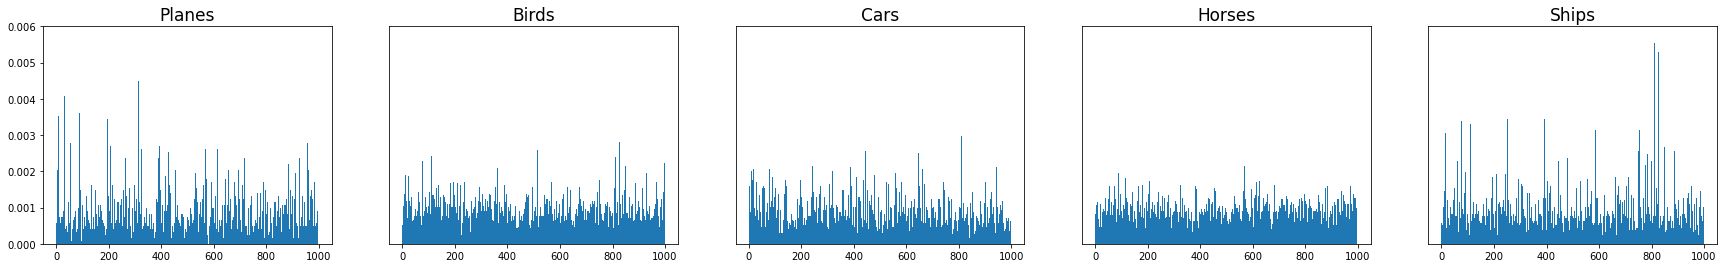

In [10]:
# Takes about 30 seconds

# We pick subset 50% -> because largest differences between classes
image_subset50 = images[int(len(images)//2):]
labels_subset50 = labels[int(len(labels)//2):]

# Relevent classes
classes = [1, 2, 3, 7, 9]
class_names = ['Planes', 'Birds', 'Cars', 'Horses', 'Ships', 'All']

# Initialize figure size
fig, axs = plt.subplots(1, 5, figsize=(30, 4))

for count, c in enumerate(classes):
    # Only keep the images of the relevant class
    relevant_labels = np.array([c])
    img_class_subset = keep_relevant_images(image_subset50, labels_subset50, relevant_labels)[0]
    
    # Get the vocabulary for these images
    img_cluster_count = get_vocabulary(img_class_subset, kmeans50, plotting=False);
    
    # Plot the histogram of the vocabulary
    weights = []
    bins = []

    for key in sorted(img_cluster_count):
        bins += [key]
        weights += [img_cluster_count[key]]
        
    # Layout
    axs[count].hist(bins, bins, weights = weights, density=True)
    axs[count].set_ylim([0, 0.006])
    axs[count].set_title(f'{class_names[count]}', fontsize=17)
    
    # Delete y-axes for 4 of them (all the same anyway)
    if count != 0:
        axs[count].yaxis.set_visible(False)

## **2.5 Classification**

We will train a classifier per each object class. Now, we take the Support Vector Machine (SVM) as an example. As a result, we will have 5 binary classifiers. Take images from the training set of the related class (should be the ones which you did not use for dictionary calculation). Represent them with histograms of visual words as discussed in the previous section. Use at least 50 training images per class or more, but remember to debug your code first! If you use the default setting, you should have 50 histograms of size 500. These will be your positive examples. Then, you will obtain histograms of visual words for images from other classes, again about 50 images per class, as negative examples. Therefore, you will have 200 negative examples. Now, you are ready to train a classifier. You should repeat it for each class. To classify a new image, you should calculate its visual words histogram as described in Section 2.4 and use the trained SVM classifier to assign it to the most probable object class. (Note that for proper SVM scores you need to use cross-validation to get a proper estimate of the SVM parameters. In this assignment, you do not have to experiment with this cross-validation step).

####  **` Q2.5: Classification (5-pts)`**

Utilize SVM and finish classification training.

**Hint:**
You can use *scikit-learn* software to conduct SVM classification. The relevant documents can be found at [link](https://scikit-learn.org/stable/modules/svm.html).

In [11]:
# Function that formats our data in a way it can be trained using an SVM

# Use images that haven't been used yet for training

# This step takes about 1 minute 30 using images[3500:] (so about 150 images per class) (nice!)

def format_binary_data(current_class, images, labels, kmeans, k=1000):
    # Our current class is the class we want with a positive label
    positive_labels = current_class
    
    images_subset = images[3500:]
    labels_subset = labels[3500:]
    
    # The negative examples
    negative_labels = [1, 2, 3, 7, 9]
    negative_labels.remove(positive_labels)
    
    # The images we need to create positive training set
    pos_img_subset = keep_relevant_images(images_subset, labels_subset, np.array([positive_labels]))[0]

    # The images we need to create negative training set
    neg_img_subset = keep_relevant_images(images_subset, labels_subset, np.array(negative_labels))[0]
    
    positive_examples = []
    negative_examples = []
    
    # For all the positive images get cluster information in big dataframe
    for image in pos_img_subset:
        image_dict = get_vocabulary([image], kmeans, plotting=False, k=k)
        positive_examples.append(image_dict)
        
    length_pos_examples = len(positive_examples)
    positive_examples = pd.DataFrame(positive_examples)

    # For all the negative images get cluster information in big dataframe
    for image in neg_img_subset:
        image_dict = get_vocabulary([image], kmeans, plotting=False, k=k)
        negative_examples.append(image_dict)
        
    length_neg_examples = len(negative_examples)
    negative_examples = pd.DataFrame(negative_examples)

    # Create an array with all the features for all images
    all_features = pd.concat([positive_examples, negative_examples], ignore_index=True).to_numpy()
    
    # Create an array with all the labels for SVM
    pos_array = np.ones(length_pos_examples)
    neg_array = np.zeros(length_neg_examples)
    all_labels = np.concatenate((pos_array, neg_array), axis=0)
    
    return all_features, all_labels

In [12]:
# Function to train the SVM

def train_SVM(current_class, images, labels, kmeans, k=1000):
    # Format the data properly for training the model
    all_features, all_labels = format_binary_data(current_class, images, labels, kmeans, k=k)
    
    # Train the SVC model
    trained_SVM = SVC(probability=True).fit(all_features, all_labels)
    
    return trained_SVM

In [13]:
# Train the SVC for all classes:

# Takes about 3 minutes for Didier
# Takes about 28 minutes for Tsatsral

# Our relevant classes
all_classes = [1, 2, 3, 7, 9]

# Initialize the dictionaries for the different kmeans image subsets and their corresponding SVM model
SVM_kmeans30 = {1: None, 2: None, 3: None, 7:None, 9:None}
SVM_kmeans40 = {1: None, 2: None, 3: None, 7:None, 9:None}
SVM_kmeans50 = {1: None, 2: None, 3: None, 7:None, 9:None}
SVM_kmeans60 = {1: None, 2: None, 3: None, 7:None, 9:None}

print("Starting training...")

for current_class in all_classes:
    SVM_kmeans30[current_class] = train_SVM(current_class, images, labels, kmeans30)
print("Done training for kmeans prediction done on 30% image subset")
    
for current_class in all_classes:
    SVM_kmeans40[current_class] = train_SVM(current_class, images, labels, kmeans40)
print("Done training for kmeans prediction done on 40% image subset")
    
for current_class in all_classes:
    SVM_kmeans50[current_class] = train_SVM(current_class, images, labels, kmeans50)
print("Done training for kmeans prediction done on 50% image subset")
    
for current_class in all_classes:
    SVM_kmeans60[current_class] = train_SVM(current_class, images, labels, kmeans60)
print("Done training for kmeans prediction done on 60% image subset")

print("Training done for all image subsets!")

Starting training...
Done training for kmeans prediction done on 30% image subset
Done training for kmeans prediction done on 40% image subset
Done training for kmeans prediction done on 50% image subset
Done training for kmeans prediction done on 60% image subset
Training done for all image subsets!


## **2.6 Evaluation**

To evaluate your system, you should take all the test images from all classes and rank them based on each binary classifier. In other words, you should classify each test image with each classifier and then sort them based on the classification score. As a result, you will have five lists of test images. Ideally, you would have images with airplanes on the top of your list which is created based on your airplane classifier, and images with cars on the top of your list which is created based on your car classifier, and so on.

In addition to the qualitative analysis, you should measure the performance of the system quantitatively with the Mean Average Precision over all classes. The Average Precision for a single class c is defines as
\begin{equation}
\frac{1}{m_c} \sum_{i=1}^{n} \frac{f_c(x_i)}{i}\mbox{ ,}
\end{equation}
where $n$ is the number of images ($n=50\times 5=250$), $m$ is the number of images of class $c$ ($m_c=50$), $x_i$ is the $i^{th}$ image in the ranked list $X = \left \{ x_1, x_2, \dots, x_n  \right \}$, and finally, $f_c$ is a function which returns the number of images of class $c$ in the first $i$ images if $x_i$ is of class $c$, and 0 otherwise. To illustrate, if we want to retrieve $R$ and we get the following sequence: $[R, R, T, R, T, T, R, T]$, then $n = 8$, $m = 4$, and $AP(R, R, T, R, T, T, R) = \frac{1}{4} \left (  \frac{1}{1} + \frac{2}{2} + \frac{0}{3} + \frac{3}{4} + \frac{0}{5} + \frac{0}{6} + \frac{4}{7} + \frac{0}{8} \right )$.

####  **` Q2.6: Evaluation and Discussion (30-pts)`**

Show the evaluation results and describe. For the qualitative evaluation, you are expected to visualize the top-5 and the bottom-5 ranked test images (based on the classifier confidence for the target class) per setup. The report should include the analysis of the results for different settings such as:
- mAP based on different subset ratios to create the vocabulary list (30%, 40%, 50% and 60%) under the fixed vocabulary size 1000.
- Based on the ratio among the above four settings that lead to the best performance, change the vocabulary sizes to different sizes (500, 1000, 1500, 2000). Report and discuss the mAP.
- Based on the above experiments, find the best setting. Report the mAP based on SIFT descriptor and HoG descriptor. 
- The impact of the hyper-parameters of SVM.  

**Hint 1:**
To alleviate the working load, the discussion on the impact of SVM’s hyper-parameter settings only need to based on the optimal settings from the first three questions.

**Hint 2:**
Be sure to discuss the differences between different settings such as vocabulary sizes in your report.

**Hint 3:**
You can use *skimage.feature.hog* to extract HoG descriptor. The relevant documents can be found at [link](https://scikit-image.org/docs/dev/api/skimage.feature.html?highlight=hog#skimage.feature.hog).

In [15]:
# Function that returns the predictions of test data from 'current_class'

def keep_relevant_prediction(df_all_pred, test_labels, current_class):
    # Set current class to be a numpy array
    current_class = np.array([current_class])
    
    # Keep only the predicitions from current class
    all_pred = df_all_pred.to_numpy()
    mask = np.isin(test_labels, current_class)
    relevant_pred = all_pred[mask, ...]
    
    return relevant_pred

In [16]:
# Function that makes a prediction given the image, kmeans and SVM_models

def make_prediction(image, kmeans, SVM_models, k=1000):
    
    # Get the histogram for the image
    img_features = get_vocabulary([image], kmeans, plotting=False, k=k)
    features_array = np.array([[value for value in img_features.values()]])
    
    # Initialize the predictions array
    predictions = []
    
    # For all models in the SVM_models dict
    for model in SVM_models.values():
        
        # Add the predictions to the list
        predictions += [model.predict_proba(features_array)[0][1]]

    return predictions

In [17]:
# Function that stores ALL predictions of ALL given test images

def predict_test_images(images, kmeans, SVM_models, k=1000):
    
    # Initialize a list for the predictions
    all_pred = []
    
    # For each image in the test images
    for image in images:
        
        # Make the predictions for a single image
        predictions = make_prediction(image, kmeans, SVM_models, k=k)
        
        # Append these to dataframe with 5 columns representing the selected classes
        all_pred.append(predictions)
        
    # Convert the nested list to dataframe for more efficient sorting with indexing in place
    df_all_pred = pd.DataFrame(all_pred, columns = ['Plane', 'Bird', 'Car', 'Horse', 'Ship'])
    
    return df_all_pred

In [18]:
# Function to take care of title layout in the plot

def create_subtitle(fig, grid, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    
    # the '\n' is important
    row.set_title(f'\n{title}', fontweight='semibold', fontsize=17)
    
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

In [19]:
# Function that plots the top and bottom 5 for each class

def plot_top_or_bottom(df, test_images, top=True):
    
    # Our classes
    classes = ['Plane', 'Bird', 'Car', 'Horse', 'Ship']
    
    # Initialize the figure
    fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10,13))
    grid = plt.GridSpec(5, 5)
    
    # Title settings
    for i in range(len(classes)):
        create_subtitle(fig, grid[i, ::], classes[i])

    fig.set_facecolor('w')

    # For all classes
    for i in range(len(classes)):
        
        # Retrieve dataframe with the sorted values
        df = df.sort_values(by=[classes[i]], ascending=False)
        
        class_images = [test_images[k] for k in df.index]

        # Select the top 5
        top_5_prob = df[classes[i]][:5].values
        top_5 = class_images[:5]
        
        # Select the bottom 5
        bottom_5_prob = df[classes[i]][-5:].values
        bottom_5 = class_images[-5:]
        
        # Plotting purposes
        if top==False:
            for j in range(5):
                axs[i, j].imshow(bottom_5[j])
                axs[i, j].yaxis.set_visible(False)
                axs[i, j].xaxis.set_visible(False)
                axs[i, j].set_title('prob = {:.2f}'.format(bottom_5_prob[j]), fontsize=12)
        else:
            for j in range(5):
                axs[i, j].imshow(top_5[j])
                axs[i, j].yaxis.set_visible(False)
                axs[i, j].xaxis.set_visible(False)
                axs[i, j].set_title('prob = {:.2f}'.format(top_5_prob[j]), fontsize=12)
                
    # Title layouts
    if top is True:
        fig.suptitle('Top 5 predictions for each class', fontsize=18)
    else:
        fig.suptitle('Bottom 5 predictions for each class', fontsize=18)
        
    plt.show()

In [ ]:
# Function that returns the AP (average precision) of a class

def calc_mAP(test_images, test_labels, current_class, df_all_pred):
    
    # Define our class names
    class_names = {1: 'Plane', 2: 'Bird', 3: 'Car', 7: 'Horse', 9: 'Ship'}
    
    # Define our class indices
    class_map = {0:1, 1:2, 2:3, 3:7, 4:9}
    
    # Retrieve the ranked list for the current class
    # here, column names are actual class names
    df_all_pred = df_all_pred.sort_values(by=[class_names[current_class]], ascending=False) 
    
    # Retrieve the true class label after the ranking
    test_labels_ranked =[test_labels[i] for i in df_all_pred.index]
    all_pred = df_all_pred.to_numpy()
    
    # Initialize variables used for calculating the AP
    agree_count = 0
    sum_fraction = 0
    
    # Looping over each x_i in the ranked DataFrame
    for i in range(len(all_pred)):
        
        # Get the predicted class
        class_key = np.where(all_pred[i] == np.max(all_pred[i]))[0][0]
        pred = class_map[class_key]
        
        # Get the actual class
        true_class = test_labels_ranked[i] 
        
        # All 3 have to agree (otherwise it is 0)
        if pred == true_class == current_class: 
            # Keeping the count of correctly predicted
            agree_count += 1
            
            # Sum of f_c(x_i) / i
            sum_fraction += agree_count / (i + 1)
    
    # m is the number of image of the class
    m = len(keep_relevant_prediction(df_all_pred, test_labels, current_class))
    
    # the average precision is the sum_fraction divided by m
    AP = sum_fraction/m
    
    return AP

**<font color=green > Q2.6 First bullet point - answer**
    
In this we are being asked to show the mAPs calculated on different image subset ratios (30%, 40%, 50% and 60%) to create the vocabulary list with a fixed vocabulary size of 1000. In this part we will plot the top 5 and bottom 5 predictions for each class for every image subset ratio.

In [21]:
# Function that runs the evaluation for the first bullet point
# We plot the top 5 and bottom 5 for each class, and calculate the APs and mAP

# Takes about a minute and a half to run

def run_evaluation(test_images, test_labels, kmeans, SVM_models, k=1000):

    # Get the predictions DataFrame
    df_all_pred = predict_test_images(test_images, kmeans, SVM_models, k=k)
    
    # Plot the top 5
    plot_top_or_bottom(df_all_pred, test_images)
    
    # Plot the bottom 5
    plot_top_or_bottom(df_all_pred, test_images, top=False)
    
    # Calculate the mAP using the APS
    sum_AP = 0
    
    for c in [1, 2, 3, 7, 9]:
        # AP calculation for one class
        AP = calc_mAP(test_images, test_labels, c, df_all_pred)
        print('AP of class {} is: {:.3f}'.format(c, AP))
        
        # Keep track of the total sum
        sum_AP += AP
        
    # Final mAP is the sum of all APs divided by the number of classes (5)
    print('mAP is:**<font color=green > Question - 1.1 answer** {:.3f}'.format(sum_AP / 5))

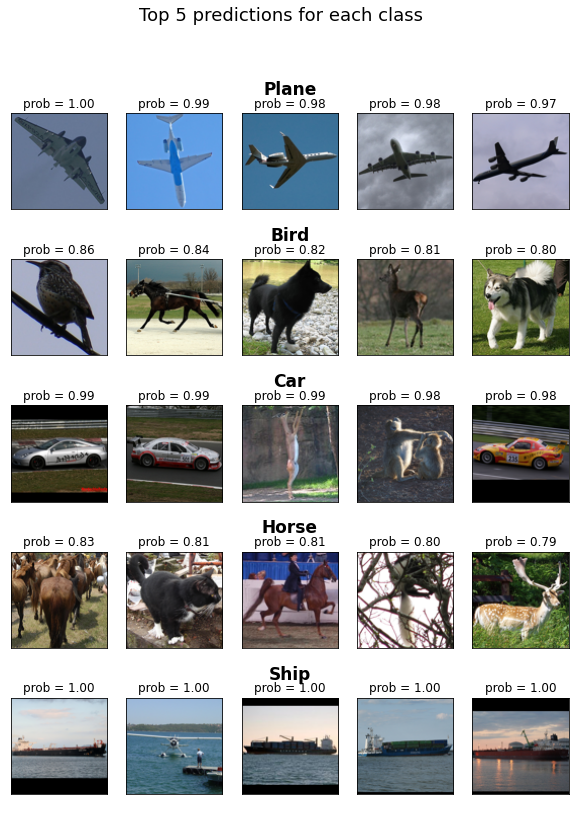

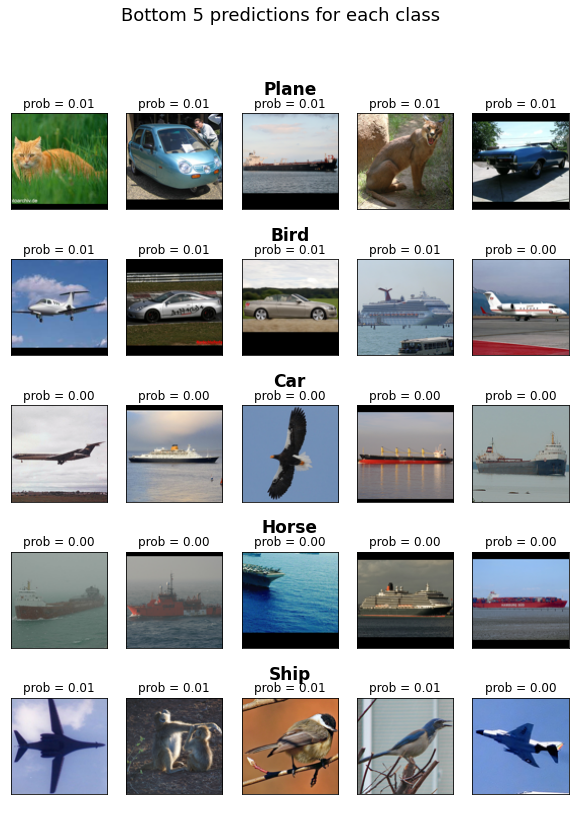

AP of class 1 is: 0.427
AP of class 2 is: 0.058
AP of class 3 is: 0.256
AP of class 7 is: 0.099
AP of class 9 is: 0.262
mAP is: 0.220


In [29]:
# Run the evaluation for 30% image subset

# Takes about 2 minutes to run
run_evaluation(test_images, test_labels, kmeans30, SVM_kmeans30, k=1000)

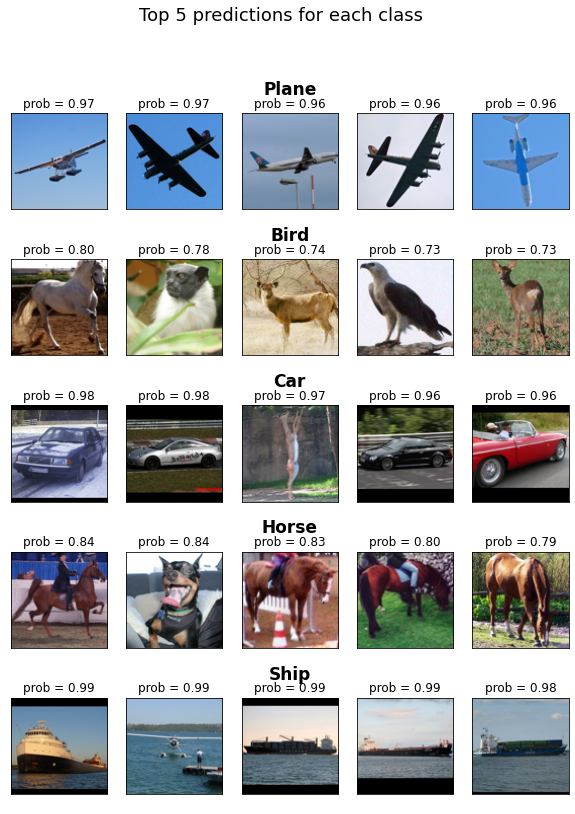

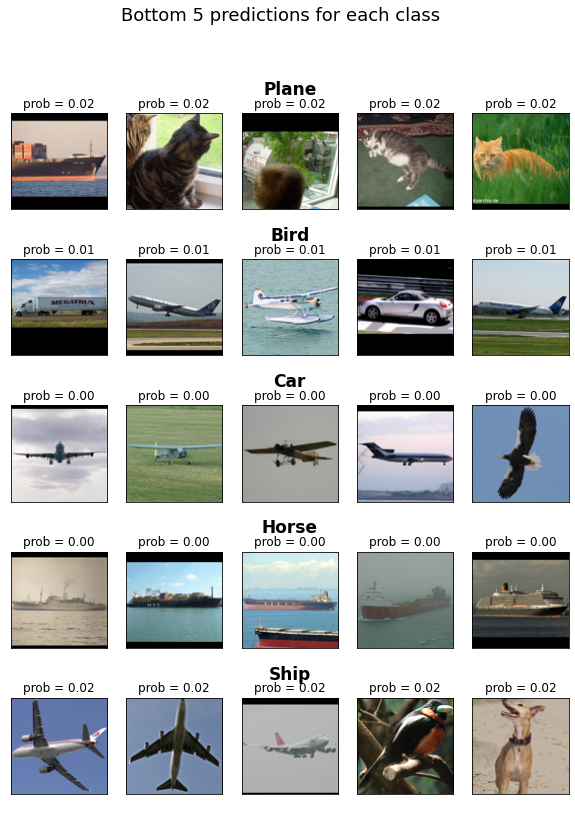

AP of class 1 is: 0.424
AP of class 2 is: 0.040
AP of class 3 is: 0.256
AP of class 7 is: 0.104
AP of class 9 is: 0.232
mAP is: 0.211


In [30]:
# Run the evaluation for 40% image subset

# Takes about 2 minutes to run
run_evaluation(test_images, test_labels, kmeans40, SVM_kmeans40, k=1000)

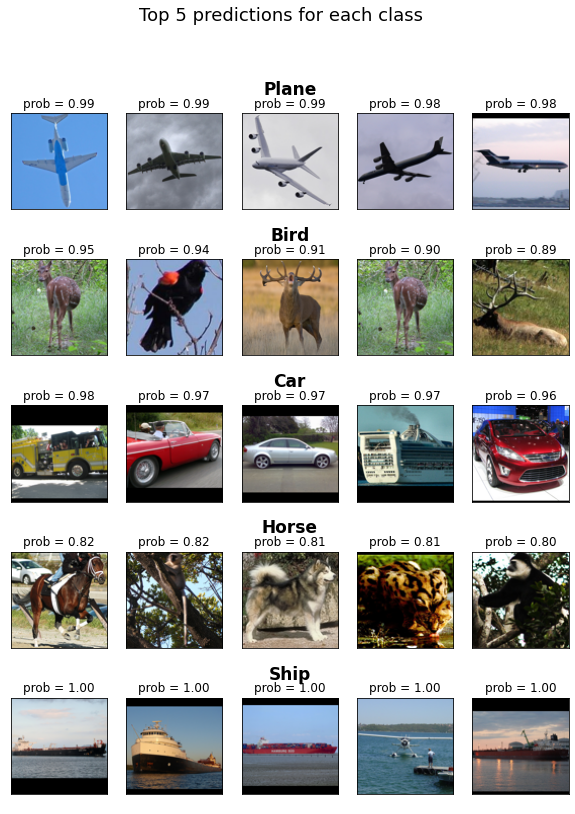

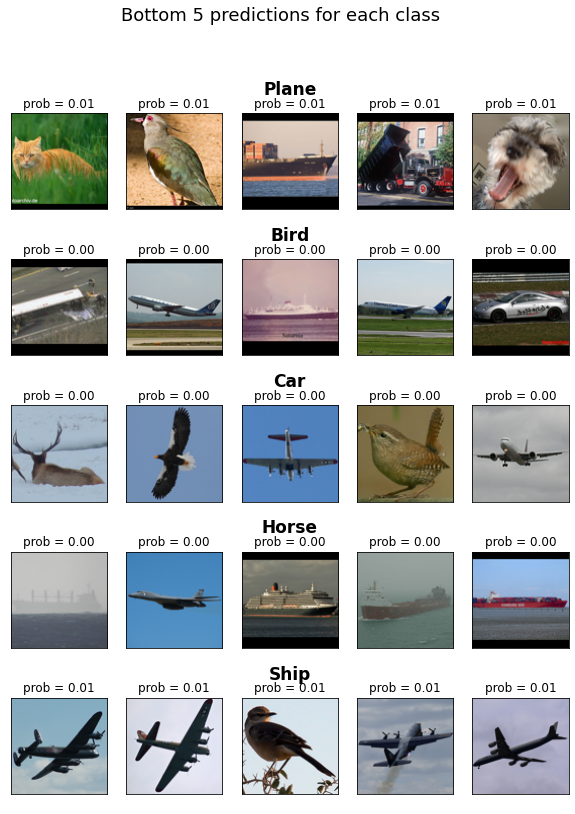

AP of class 1 is: 0.405
AP of class 2 is: 0.055
AP of class 3 is: 0.259
AP of class 7 is: 0.097
AP of class 9 is: 0.240
mAP is: 0.211


In [31]:
# Run the evaluation for 50% imagesubset

# Takes about 2 minutes to run
run_evaluation(test_images, test_labels, kmeans50, SVM_kmeans50, k=1000)

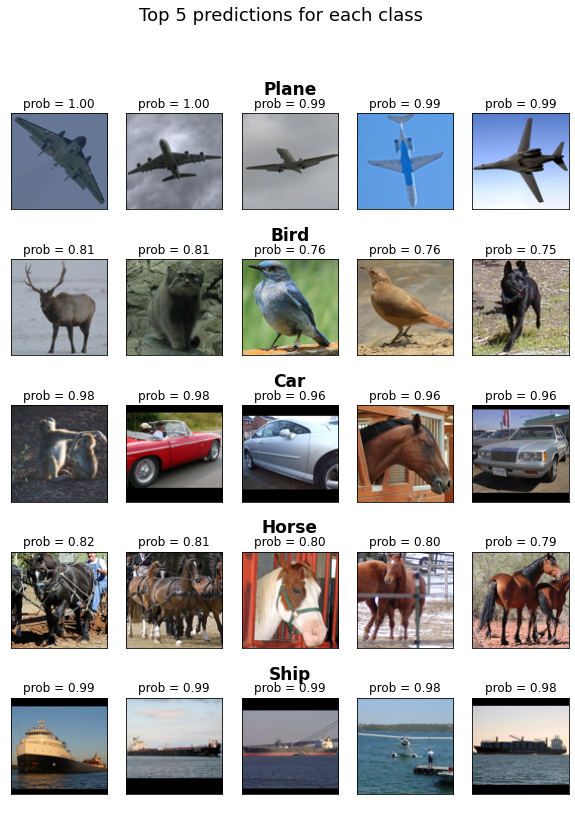

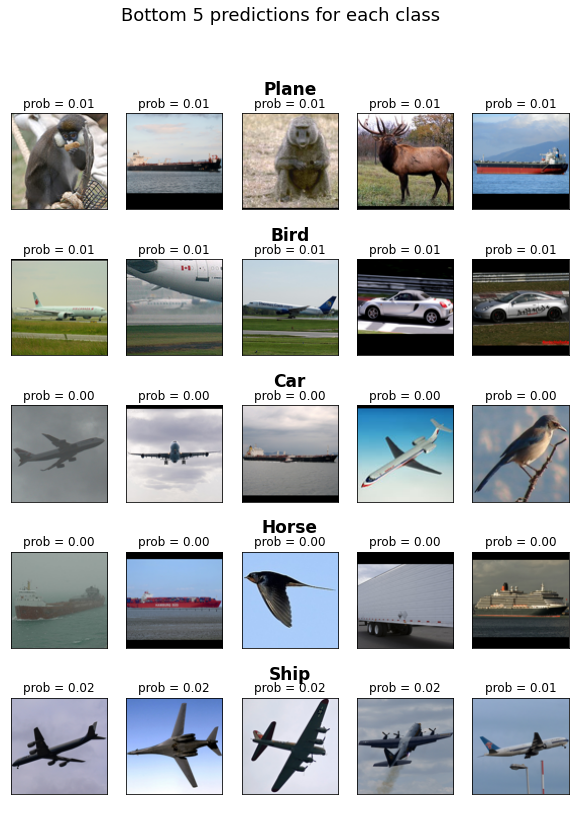

AP of class 1 is: 0.418
AP of class 2 is: 0.048
AP of class 3 is: 0.279
AP of class 7 is: 0.118
AP of class 9 is: 0.238
mAP is: 0.220


In [32]:
# Run the evaluation for 60% image subset

# Takes about 2 minutes to run
run_evaluation(test_images, test_labels, kmeans60, SVM_kmeans60, k=1000)

**<font color=green > Q2.6 Second bullet point - answer**
    
In the previous question we observed that the four different ratio settings lead to similar performances. However we choose to continue using the 30% image subset, since it has the (combined) highest mAP and a very high accuracy on the Plane and Ship classes. In addition, since it is a smaller size it will take a shorter time to train.
    
In this section the vocabulary sizes will be varied when training the KMeans model (on the 30% image subset). For each result the top 5 and bottom 5 predictions will be displayed and the mean average precision will once again be calculated, to deduce which setting has the highest performance.

In [39]:
#  we decide to go with 30% images for calculating the vocabulary
p = 0.3

In [40]:
# Time estimation using small subsets
# 100 images, 500 vocab size = 5 seconds
# 200 images, 500 vocab size = 13 seconds
# 500 images, 500 vocab size = 40 seconds
# 500 images, 2000 vocab size = 2 minutes

# Time of running the training on the 30% subset
# kmeans500 takes around 3 minutes
# kmeans1500 takes around 6 minutes
# kmeans2000 takes around 7 minutes
# Total time around 16 minutes

# Run the kmeans algorithms on the different vocabulary sizes (1000 already done before)

print("Starting training...")

# Vocabulary size = 500
_, kmeans500 = find_centers(feature_extraction(images[:int(len(images) * p)], 'keypoints')[0], k=500)
print("KMeans algorithm using a vocab size of 500 has been trained!")

# Vocabulary size = 1500
_, kmeans1500 = find_centers(feature_extraction(images[:int(len(images) * p)], 'keypoints')[0], k=1500)
print("KMeans algorithm using a vocab size of 1500 has been trained!")

# Vocabulary size = 2000
_, kmeans2000 = find_centers(feature_extraction(images[:int(len(images) * p)], 'keypoints')[0], k=2000)
print("KMeans algorithm using a vocab size of 2000 has been trained!")

print("Training done for all vocabulary sizes!")

Starting training...
KMeans algorithm using a vocab size of 500 has been trained!
KMeans algorithm using a vocab size of 1500 has been trained!
KMeans algorithm using a vocab size of 2000 has been trained!
Training done for all vocabulary sizes!


In [44]:
# Now train the corresponding SVM models (those for vocab size 1000 have already been done)

# Takes around 2 and a half minutes!

# Our relevant classes
all_classes = [1, 2, 3, 7, 9]

# Initializing the dictionaries containing all our SVM models
SVM_kmeans500 = {1: None, 2: None, 3: None, 7:None, 9:None}
SVM_kmeans1500 = {1: None, 2: None, 3: None, 7:None, 9:None}
SVM_kmeans2000 = {1: None, 2: None, 3: None, 7:None, 9:None}

print("Starting training...")
print("")

# Vocabulary size = 500
for current_class in all_classes:
    print(f"SVM training using KMeans with a vocab size of 500 for class {current_class} started")
    SVM_kmeans500[current_class] = train_SVM(current_class, images, labels, kmeans500, k=500)
print("The SVM models trained on a vocabulary size of 500 have all been trained!")
print("")
    
# Vocabulary size = 1500
for current_class in all_classes:
    print(f"SVM training using KMeans with a vocab size of 1500 for class {current_class} started")
    SVM_kmeans1500[current_class] = train_SVM(current_class, images, labels, kmeans1500, k=1500)
print("The SVM models trained on a vocabulary size of 1500 have all been trained!")
print("")
    
# Vocabulary size = 2000
for current_class in all_classes:
    print(f"SVM training using KMeans with a vocab size of 2000 for class {current_class} started")
    SVM_kmeans2000[current_class] = train_SVM(current_class, images, labels, kmeans2000, k=2000)
print("The SVM models trained on a vocabulary size of 2000 have all been trained!")
print("")

print("All different SVM models have been trained and can be accessed through the SVM model dictionaries!")
    

Starting training...

SVM training using KMeans with a vocab size of 500 for class 1 started
SVM training using KMeans with a vocab size of 500 for class 2 started
SVM training using KMeans with a vocab size of 500 for class 3 started
SVM training using KMeans with a vocab size of 500 for class 7 started
SVM training using KMeans with a vocab size of 500 for class 9 started
The SVM models trained on a vocabulary size of 500 have all been trained!

SVM training using KMeans with a vocab size of 1500 for class 1 started
SVM training using KMeans with a vocab size of 1500 for class 2 started
SVM training using KMeans with a vocab size of 1500 for class 3 started
SVM training using KMeans with a vocab size of 1500 for class 7 started
SVM training using KMeans with a vocab size of 1500 for class 9 started
The SVM models trained on a vocabulary size of 1500 have all been trained!

SVM training using KMeans with a vocab size of 2000 for class 1 started
SVM training using KMeans with a vocab s

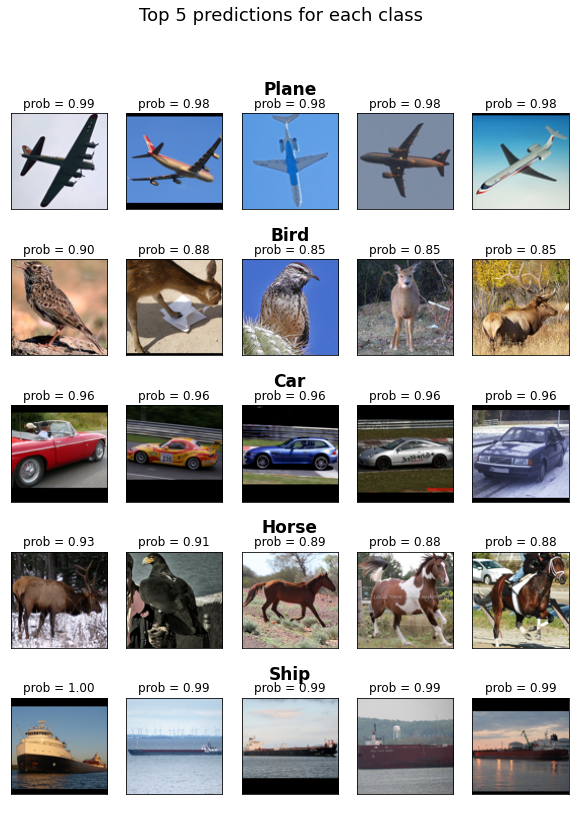

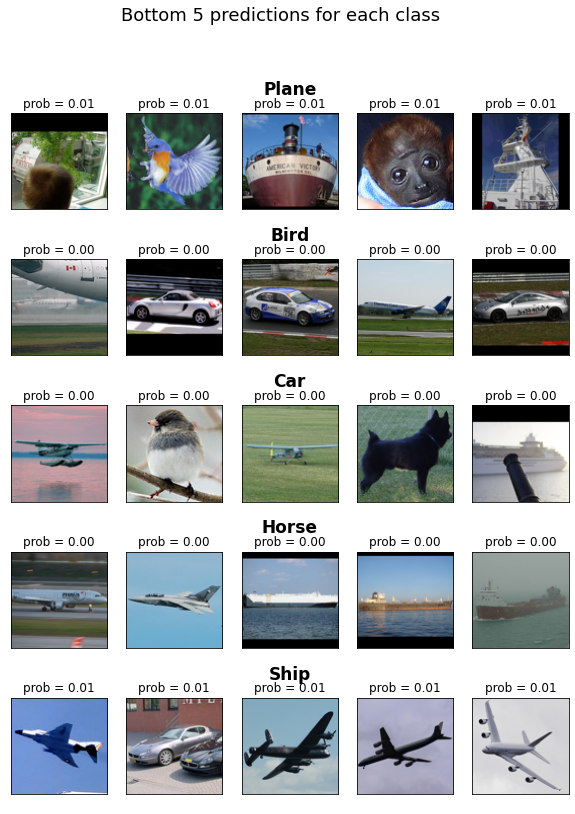

AP of class 1 is: 0.427
AP of class 2 is: 0.059
AP of class 3 is: 0.263
AP of class 7 is: 0.137
AP of class 9 is: 0.254
mAP is: 0.228


In [45]:
# Run the evaluation for vocab size of 500 (image subset = 30%)

# Takes about 2 minutes to run
run_evaluation(test_images, test_labels, kmeans500, SVM_kmeans500, k=500)

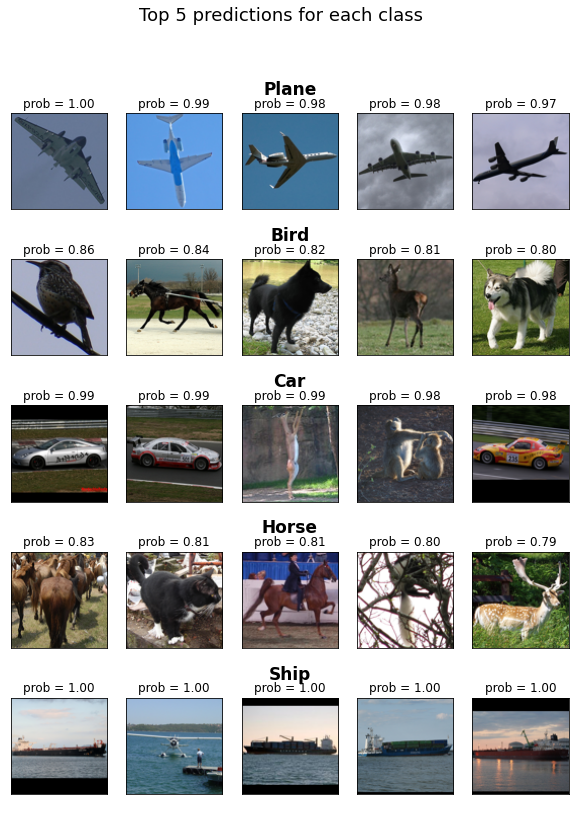

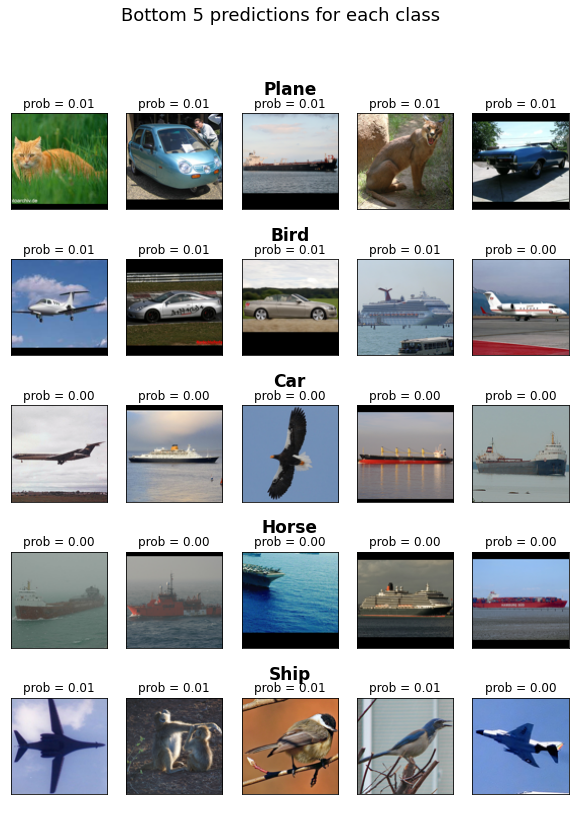

AP of class 1 is: 0.427
AP of class 2 is: 0.058
AP of class 3 is: 0.256
AP of class 7 is: 0.099
AP of class 9 is: 0.262
mAP is: 0.220


In [50]:
# Run the evaluation for vocab size of 1000 (image subset = 30%)

# Takes about 2 minutes to run

# Use kmeans30 and SVM_kmeans30 from the first bullet point (which was trained on vocab size 1000)
run_evaluation(test_images, test_labels, kmeans30, SVM_kmeans30, k=1000)

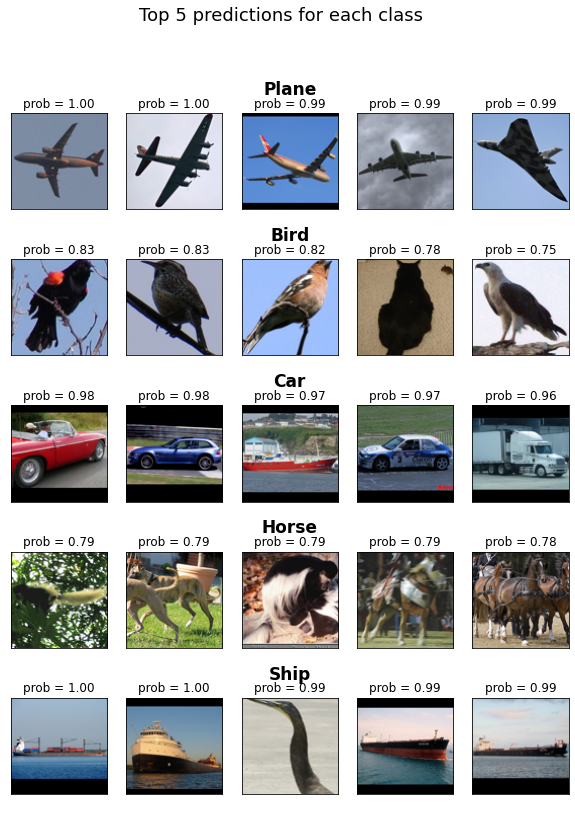

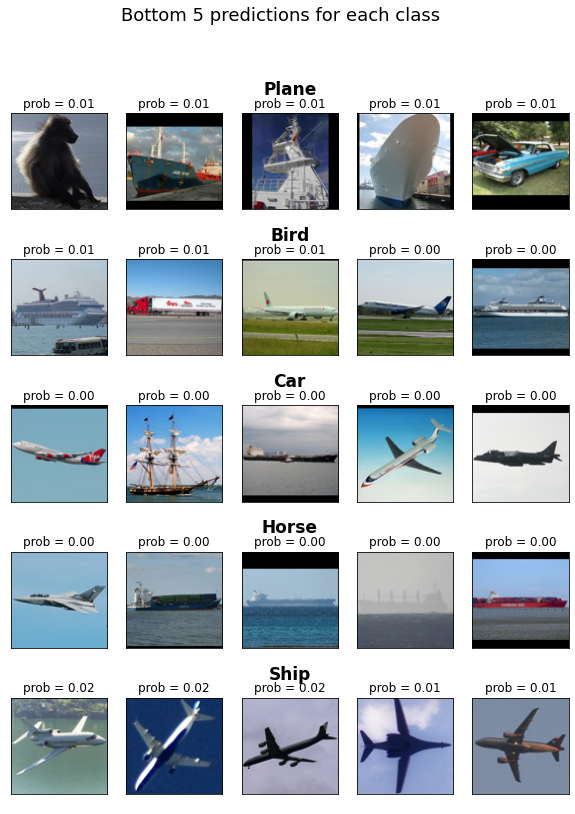

AP of class 1 is: 0.429
AP of class 2 is: 0.052
AP of class 3 is: 0.235
AP of class 7 is: 0.095
AP of class 9 is: 0.231
mAP is: 0.209


In [47]:
# Run the evaluation for vocab size of 1500 (image subset = 30%)

# Takes about 2 minutes to run
run_evaluation(test_images, test_labels, kmeans1500, SVM_kmeans1500, k=1500)

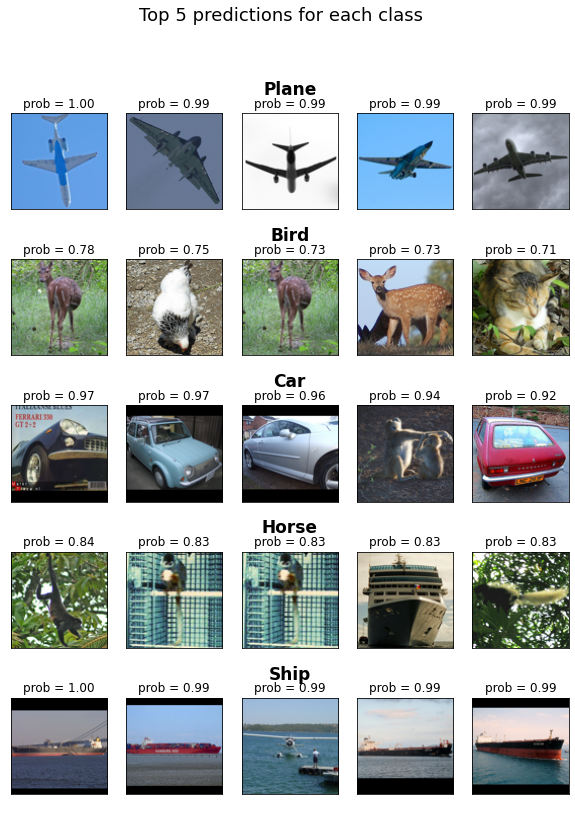

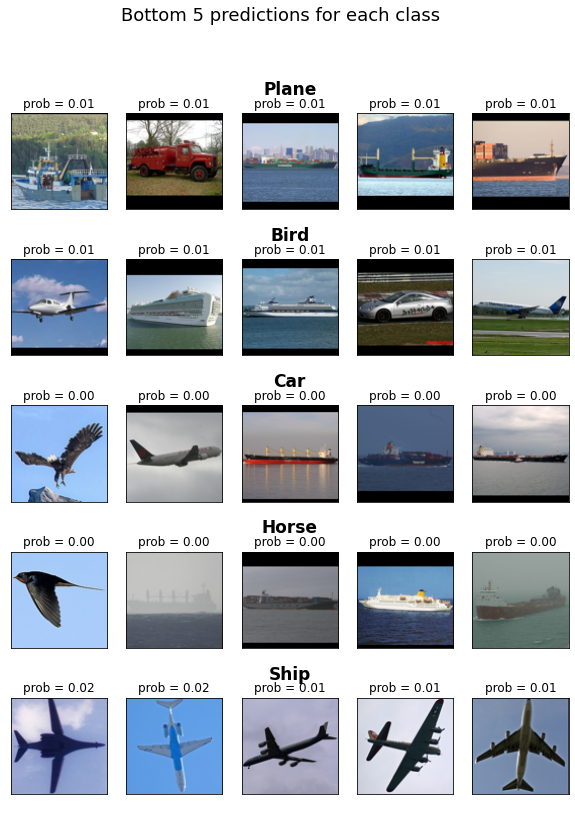

AP of class 1 is: 0.417
AP of class 2 is: 0.030
AP of class 3 is: 0.220
AP of class 7 is: 0.098
AP of class 9 is: 0.248
mAP is: 0.203


In [48]:
# Run the evaluation for vocab size of 2000 (image subset = 30%)

# Takes about 2 minutes to run
run_evaluation(test_images, test_labels, kmeans2000, SVM_kmeans2000, k=2000)

**<font color=green > Q2.6 Third bullet point - answer**
    
In the previous question we observed that the four differe

In [ ]:
# We set the image subset size to 30% (see first bullet point)
p = 0.5

# We set the vocabulary size to 500 (see second bullet point)
k = 500

In [ ]:
# need to first implement the hog option
#_, kmeans_hog = find_centers(feature_extraction(images[:int(len(images)*p)], hog=True)[0], k=k)

In [ ]:
all_classes = [1, 2, 3, 7, 9]

SVM_hog = {1: None, 2: None, 3: None, 7:None, 9:None}

for current_class in all_classes:
    SVM_hog[current_class] = train_SVM(current_class, images, labels, kmeans_hog, k=k)

In [ ]:
run_evaluation(test_images, test_labels, kmeans_hog, SVM_hog, k=k)

**<font color=green > Q2.6 Third bullet point - answer**
    
In the previous question we observed that the four differe

In [116]:
# TODO: implement a new function (similar to train_SVM) and use hyperparameters as the parameters